# Import Libraries to the project

In [1]:
import tensorflow as tf
### Installing the needed libraries
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")
import datetime
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC
#import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import plotly.express as px
import shutil

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load data

In [2]:
train_data_path = '/kaggle/input/chest-xray/chest_xray/train'
val_data_path = '/kaggle/input/chest-xray/chest_xray/val'
test_data_path = '/kaggle/input/chest-xray/chest_xray/test'

Count total number of images count in training, validation adn testing  dataset

In [3]:
train_val_data_path = '/kaggle/working/train_val_data'
os.makedirs(train_val_data_path, exist_ok=True)


In [4]:
img_height = 96
img_width = 96
epochs = 30

In [5]:
# Merge train data
for root, _, files in os.walk(train_data_path):
    for file in files:
        source_path = os.path.join(root, file)
        destination_path = os.path.join(train_val_data_path, os.path.basename(root), file)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

# Merge validation data
for root, _, files in os.walk(val_data_path):
    for file in files:
        source_path = os.path.join(root, file)
        destination_path = os.path.join(train_val_data_path, os.path.basename(root), file)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

In [39]:
image_generator = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    validation_split=0.1,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)


train_generator = image_generator.flow_from_directory(train_val_data_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    color_mode='grayscale',
                                                      subset='training',
                                                    class_mode='categorical')
validation_generator = image_generator.flow_from_directory(train_val_data_path,
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    subset='validation')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  samplewise_center=True,
                                  samplewise_std_normalization=True)

test_generator = test_datagen.flow_from_directory(test_data_path,
                                                  target_size=(img_height, img_width),
                                                  batch_size=10,
                                                  shuffle=False,
                                                  class_mode='categorical',
                                                  color_mode='grayscale')
   

Found 4710 images belonging to 2 classes.
Found 522 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Visualize the data

In [7]:
# Train dataset
train_class_labels = train_generator.class_indices
train_class_counts = train_generator.classes
class_names = list(train_class_labels.keys())
class_count_dict = {class_name: sum(train_class_counts == train_class_labels[class_name]) for class_name in class_names}
# Create a bar plot using Plotly
fig = px.bar(x=class_names, y=list(class_count_dict.values()), color=class_names,
             text=list(class_count_dict.values()), color_discrete_sequence=["orange", "purple"],
             template='plotly_dark')

fig.update_layout(xaxis_title='Class', yaxis_title='Count', title='Number of Images in Each Class in Training dataset',
                  width=600, height=450)  # Adjust the size as desired

fig.update_traces(textposition='outside')

fig.show()


# Validation dataset
val_class_labels = validation_generator.class_indices
val_class_counts = validation_generator.classes
class_names = list(val_class_labels.keys())
class_count_dict = {class_name: sum(val_class_counts == val_class_labels[class_name]) for class_name in class_names}
# Create a bar plot using Plotly
fig = px.bar(x=class_names, y=list(class_count_dict.values()), color=class_names,
             text=list(class_count_dict.values()), color_discrete_sequence=["orange", "purple"],
             template='plotly_dark')

fig.update_layout(xaxis_title='Class', yaxis_title='Count', title='Number of Images in Each Class in Validation dataset',
                  width=600, height=450)  # Adjust the size as desired

fig.update_traces(textposition='outside')

fig.show()

# Test dataset

test_class_labels = test_generator.class_indices
test_class_counts = test_generator.classes
class_names = list(test_class_labels.keys())
class_count_dict = {class_name: sum(test_class_counts == test_class_labels[class_name]) for class_name in class_names}

# Create a bar plot using Plotly
fig = px.bar(x=class_names, y=list(class_count_dict.values()), color=class_names,
             text=list(class_count_dict.values()), color_discrete_sequence=["orange", "purple"],
             template='plotly_dark')

fig.update_layout(xaxis_title='Class', yaxis_title='Count', title='Number of Images in Each Class in testing dataset',
                  width=600, height=450)  # Adjust the size as desired

fig.update_traces(textposition='outside')
fig.show()



total_training_samples = train_generator.n # The n attribute stores the total number of samples
total_val_samples = validation_generator.n
total_test_samples = test_generator.n


classes = ['Training', 'Validation', 'Test']
counts = [total_training_samples, total_val_samples, total_test_samples]

# Create a bar plot using Plotly
fig = px.bar(x=classes, y=counts, color=classes,
             text=counts, color_discrete_sequence=["orange", "purple", "steelblue"],
             template='plotly_dark')

fig.update_layout(xaxis_title='Dataset', yaxis_title='Count', title='Number of Images in Each Dataset',
                  width=600, height=450)  # Adjust the size as desired

fig.update_traces(textposition='outside')

fig.show()


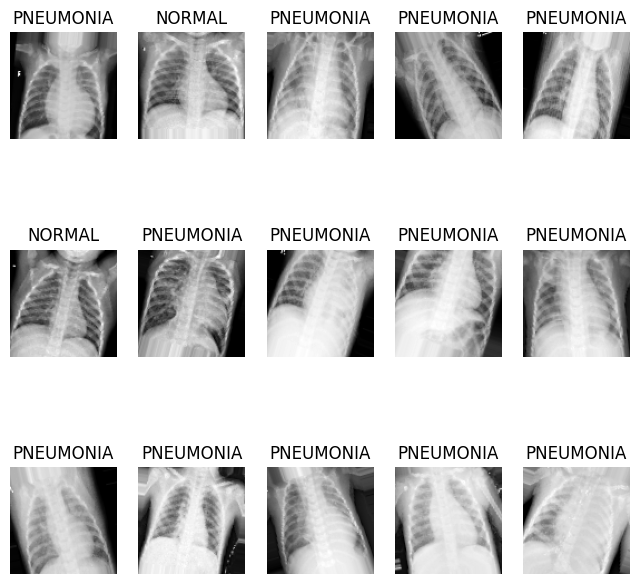

In [12]:
class_names = {0: "NORMAL", 1: "PNEUMONIA"}
num_images = 15

x_batch, y_batch = next(train_generator)
# Plotting the images
plt.figure(figsize=(8, 8))
for i in range(num_images):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_batch[i], cmap='gray')
    label = class_names[np.argmax(y_batch[i])]
    plt.title(label)
    plt.axis("off")

plt.show()


Model Architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

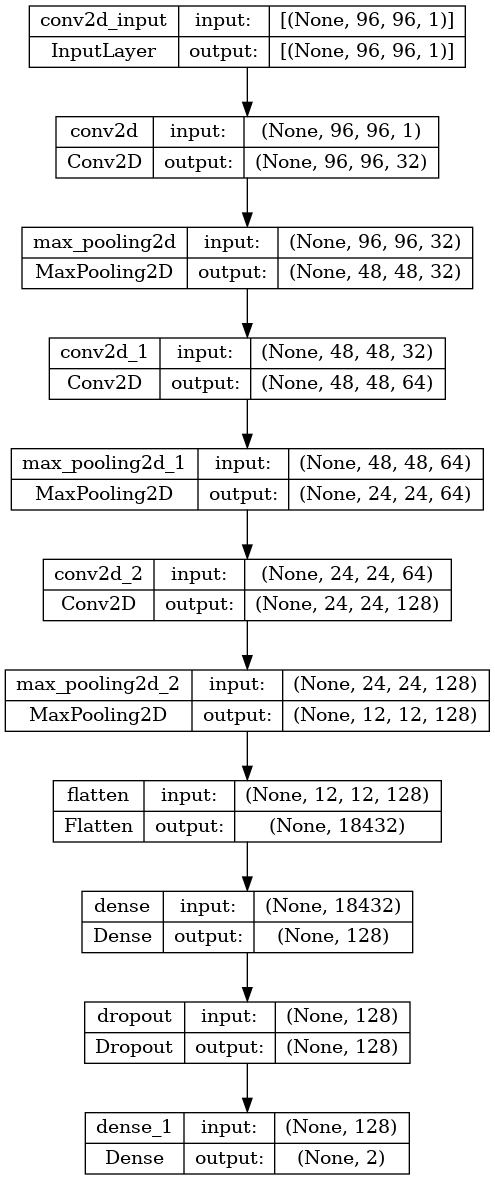

In [25]:
### Building the model
model = Sequential()

model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(img_height, img_width, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (4, 4), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (4, 4), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
### Show the model summary
model.summary()


plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
### Loading the TensorBoard notebook extension
#%load_ext tensorboard
### creating a TensorBoard callback with a unique log directory based on the current date and time
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [26]:
import keras.backend as K
K.clear_session()

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                     callbacks=[early_stopping])

Epoch 1/30
148/148 [==============================] - 37s 238ms/step - loss: 0.3384 - accuracy: 0.8471 - precision: 0.8471 - recall: 0.8471 - auc: 0.9294 - val_loss: 0.2420 - val_accuracy: 0.8851 - val_precision: 0.8851 - val_recall: 0.8851 - val_auc: 0.9637
Epoch 2/30
148/148 [==============================] - 35s 235ms/step - loss: 0.1787 - accuracy: 0.9295 - precision: 0.9295 - recall: 0.9295 - auc: 0.9805 - val_loss: 0.1809 - val_accuracy: 0.9100 - val_precision: 0.9100 - val_recall: 0.9100 - val_auc: 0.9808
Epoch 3/30
148/148 [==============================] - 34s 233ms/step - loss: 0.1584 - accuracy: 0.9399 - precision: 0.9399 - recall: 0.9399 - auc: 0.9841 - val_loss: 0.1423 - val_accuracy: 0.9387 - val_precision: 0.9387 - val_recall: 0.9387 - val_auc: 0.9890
Epoch 4/30
148/148 [==============================] - 34s 231ms/step - loss: 0.1348 - accuracy: 0.9505 - precision: 0.9505 - recall: 0.9505 - auc: 0.9887 - val_loss: 0.1254 - val_accuracy: 0.9483 - val_precision: 0.9483 - v

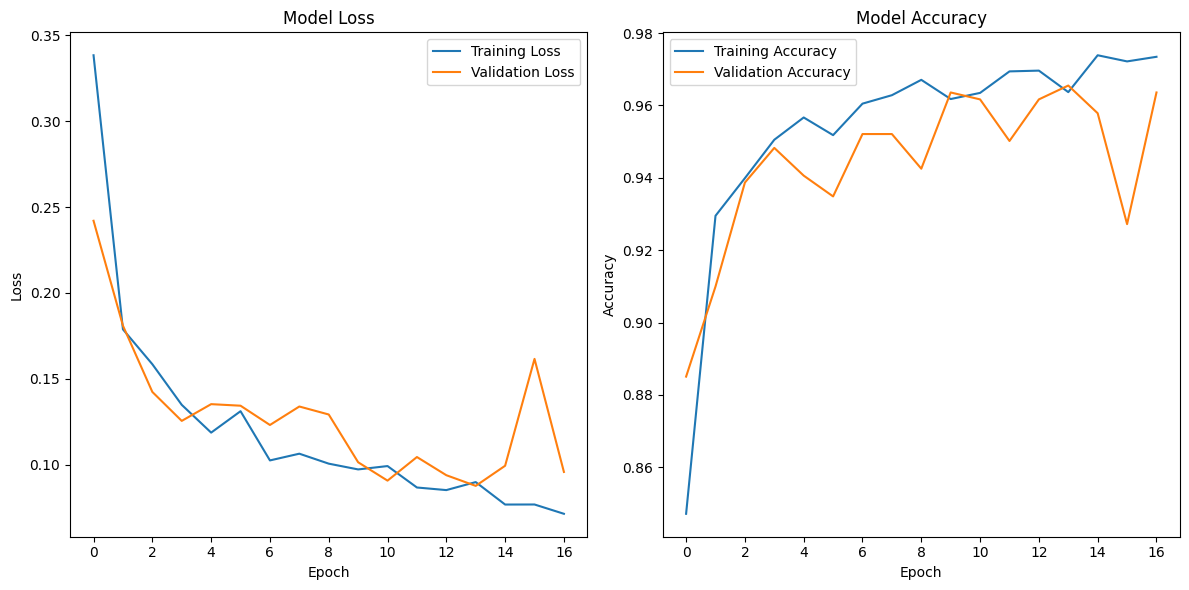

In [29]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
num_epochs = range(len(train_loss))

plt.figure(figsize=(12, 6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(num_epochs, train_loss, label='Training Loss')
plt.plot(num_epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(num_epochs, train_acc, label='Training Accuracy')
plt.plot(num_epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
### Evaluating the model on the test set
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(test_generator, verbose=2)


print('Test Loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test precision', test_precision)
print('Test recall', test_recall)
print('test AUC',test_auc)


63/63 - 4s - loss: 0.5527 - accuracy: 0.8574 - precision: 0.8574 - recall: 0.8574 - auc: 0.9171 - 4s/epoch - 59ms/step
Test Loss: 0.5526774525642395
Test accuracy: 0.8573718070983887
Test precision 0.8573718070983887
Test recall 0.8573718070983887
test AUC 0.917060911655426


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

predicted_vals = model.predict(test_generator, steps=len(test_generator))
predicted_categories = np.argmax(predicted_vals, axis = 1)
print(confusion_matrix(test_generator.classes, predicted_categories))
pd.DataFrame(classification_report(test_generator.classes, predicted_categories, output_dict=True))

63/63 [==============================] - 4s 60ms/step
[[148  86]
 [  4 386]]


,0,1,accuracy,macro avg,weighted avg
precision,0.973684,0.817797,0.855769,0.895740,0.876254
recall,0.632479,0.989744,0.855769,0.811111,0.855769
f1-score,0.766839,0.895592,0.855769,0.831216,0.847310
support,234.000000,390.000000,0.855769,624.000000,624.000000


20/20 [==============================] - 4s 168ms/step


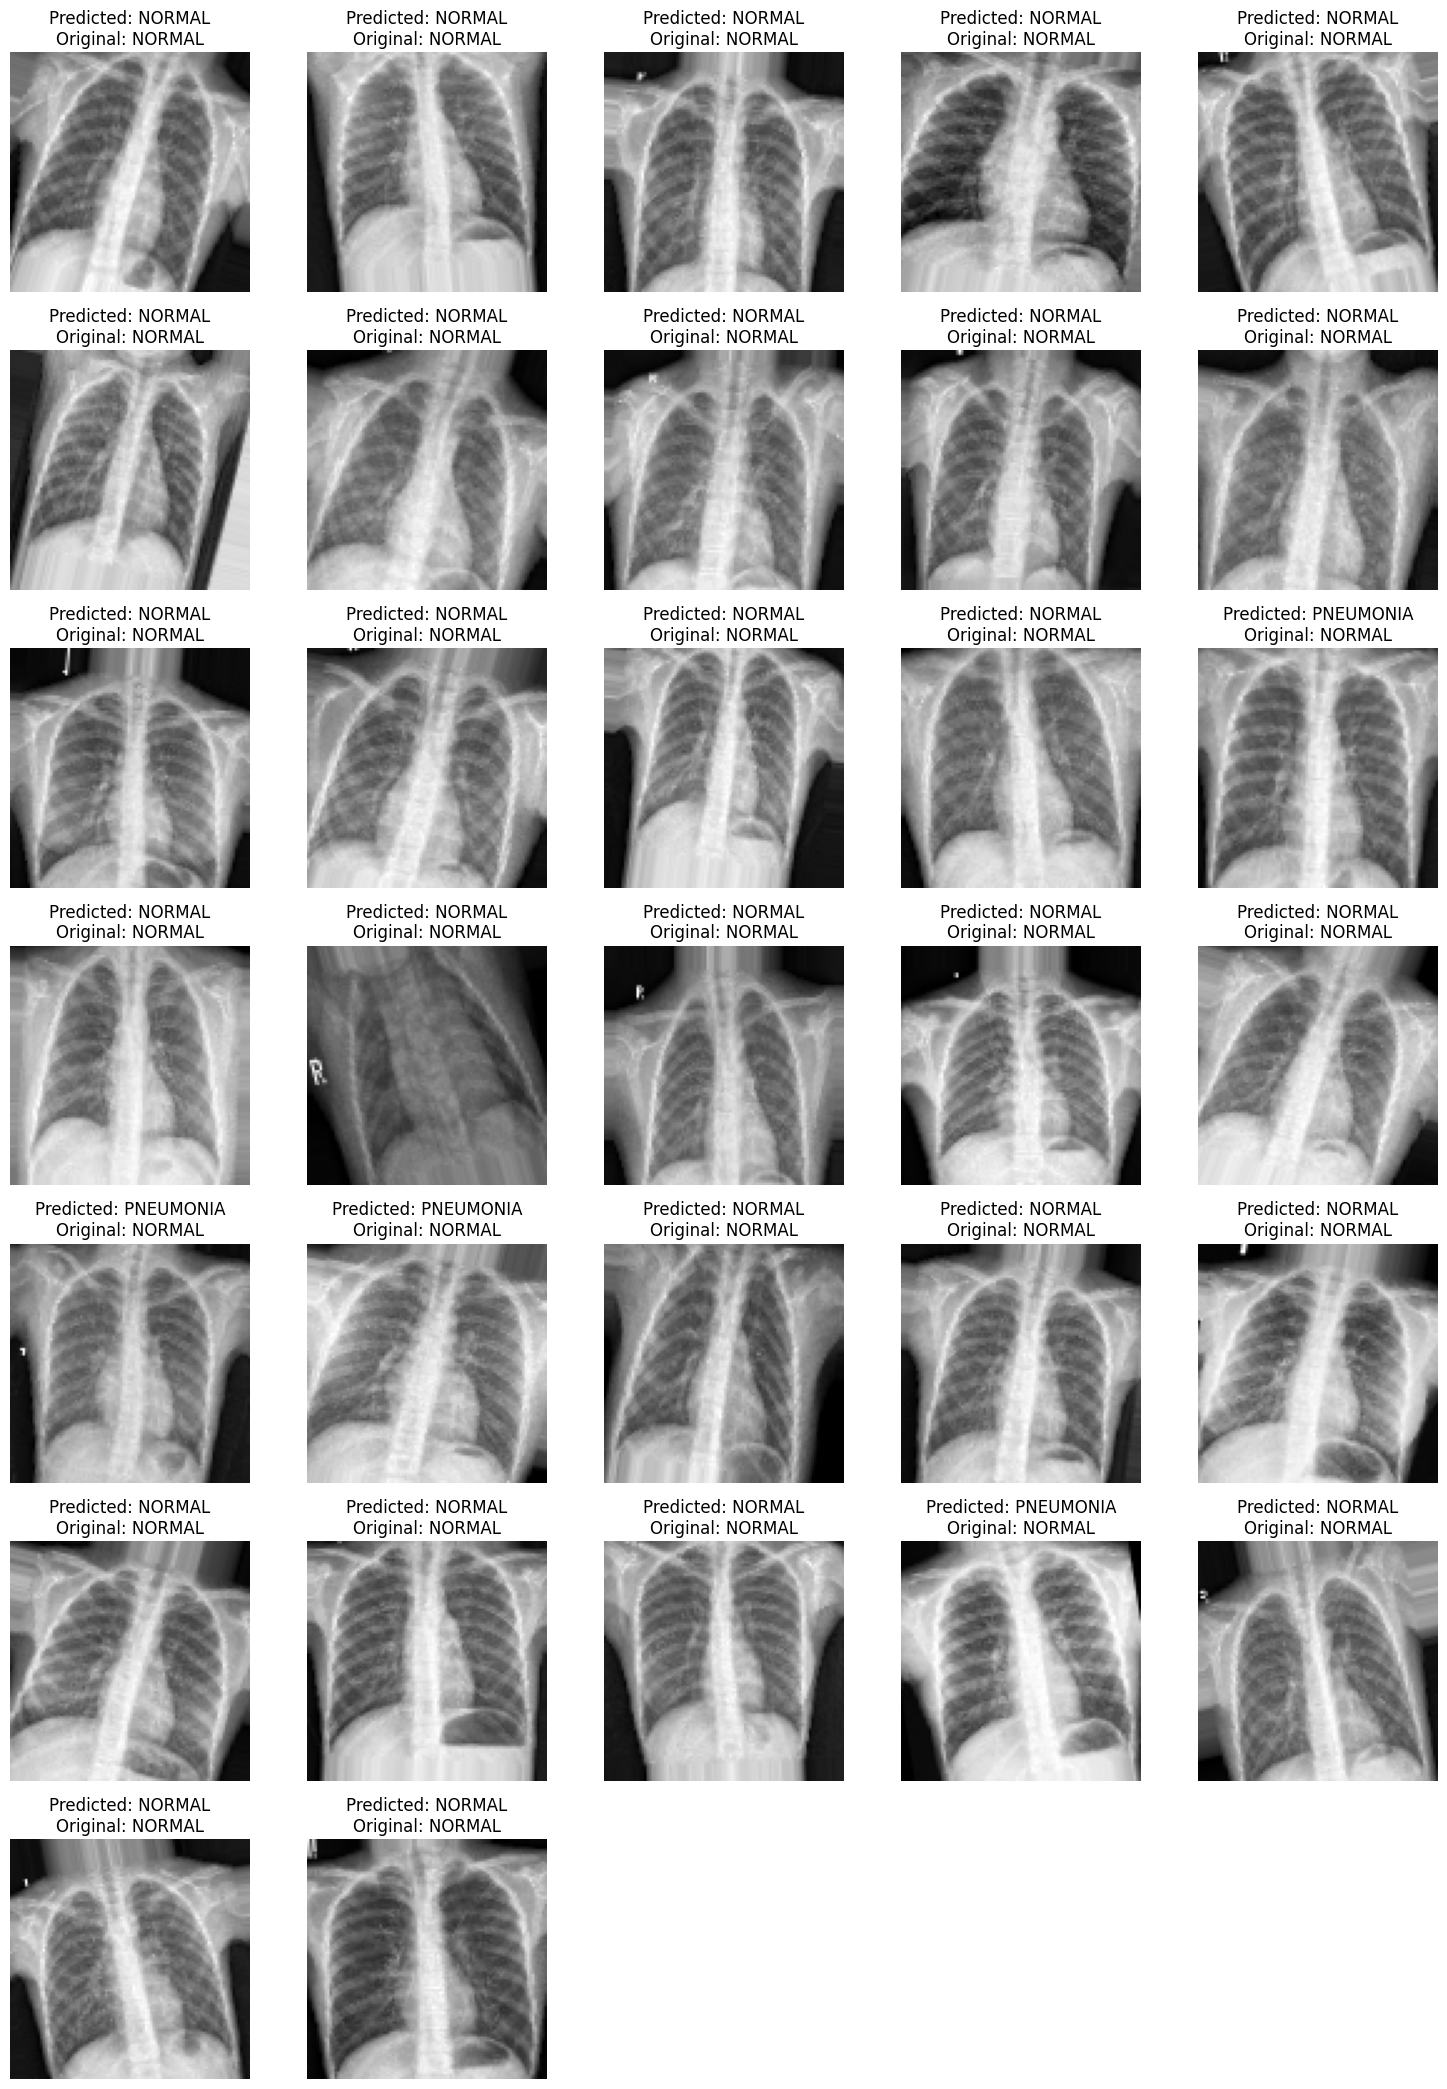

In [31]:
import matplotlib.pyplot as plt

# Get the predicted class labels for the test images
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get a batch of test images and their corresponding labels
x_test_batch, y_test_batch = next(test_generator)

# Define the number of images per row and the total number of images
images_per_row = 5
num_images = len(x_test_batch)

# Calculate the number of rows needed to display the images
num_rows = (num_images + images_per_row - 1) // images_per_row

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 3*num_rows))
axes = axes.flatten()

# Plot the images with predicted and original class names
for i in range(num_images):
    axes[i].imshow(x_test_batch[i], cmap='gray')
    axes[i].set_title('Predicted: {}\nOriginal: {}'.format(class_names[y_pred_classes[i]], class_names[np.argmax(y_test_batch[i])]))
    axes[i].axis('off')

# Remove any unused subplots
if num_images < len(axes):
    for j in range(num_images, len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()



In [44]:
export_path = 'model/cnn-chest-xray-classification'
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    
    )

export_path = model/cnn-chest-xray-classification



In [48]:
! zip -r cnn_model.zip 'model/cnn-chest-xray-classification'

  adding: model/cnn-chest-xray-classification/ (stored 0%)
  adding: model/cnn-chest-xray-classification/fingerprint.pb (stored 0%)
  adding: model/cnn-chest-xray-classification/assets/ (stored 0%)
  adding: model/cnn-chest-xray-classification/variables/ (stored 0%)
  adding: model/cnn-chest-xray-classification/variables/variables.data-00000-of-00001 (deflated 26%)
  adding: model/cnn-chest-xray-classification/variables/variables.index (deflated 66%)
  adding: model/cnn-chest-xray-classification/keras_metadata.pb (deflated 91%)
  adding: model/cnn-chest-xray-classification/saved_model.pb (deflated 88%)


In [49]:
#Save model
import os
from IPython.display import FileLink
os.chdir(r'/kaggle/working')
FileLink(r'cnn_model.zip')

/kaggle/working/cnn_model.zip